# INFO 370 Lab 5
*Name: Brian Park*

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## 1. Boston Housing Data

1. load file boston.csv and ensure the file loaded good. How many observations and variables are there?

In [77]:
#1-1
dfBoston = pd.read_csv("../data/boston.csv.bz2", sep = "\t")
dfBoston.shape, dfBoston.head(5)

((506, 14),
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
 
     black  lstat  medv  
 0  396.90   4.98  24.0  
 1  396.90   9.14  21.6  
 2  392.83   4.03  34.7  
 3  394.63   2.94  33.4  
 4  396.90   5.33  36.2  )

The dataset has 506 observations and 14 variables.

## 2. Simple Regression

1. Let’s start the average house size (rm: average number of rooms). Do the following: (a) run the linear regression in the form medvi = β0 + β1 · rmi + ϵi and show the regression output. (b) interpret the coefficients (β0 and β1). What do these numbers mean? Are these statistically significant? (c) Try to think about what do these numbers tell about the city and society. Remember: this is not about house price versus house size, this is neighborhood’s median house price versus neighborhood’s average house size. Try to think in terms of poor and rich neighborhoods! (d) create a plot of medv (vertical) versus rm (horizontal) (e) add your regression line on the plot. (f) comment the plot: is the line upward or downward sloping? Do you see the dots trending up/down in a similar fashion?
2. Now repeat the above with age

In [78]:
#2-1-a
m = smf.ols("medv ~ rm", data=dfBoston).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.49e-74
Time:                        08:43:51   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#2-1-b-β0

The neighborhood’s median value of houses is -34.6706 thousands when there are no rooms in neighborhood’s house. It is statistically significant because P is smaller 5%.

In [80]:
#2-1-b-β1

The neighborhood's houses with one room larger have \\$9102.1 larger the mediean value of houses. It is also statistically significant because P is smaller 5%.

In [81]:
#2-1-c

The city or society that has larger houses is more expensive. Residents who own larger houses may tend to be richer.

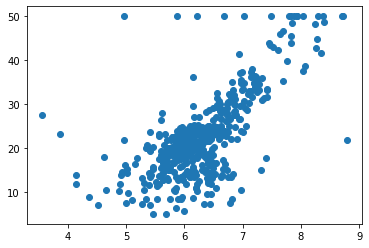

In [82]:
#2-1-d
_ = plt.scatter(dfBoston.rm, dfBoston.medv)

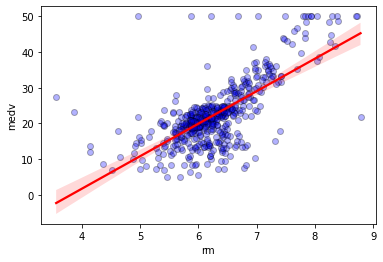

In [83]:
#2-1-e
import seaborn as sns
_ = sns.regplot(x = "rm", y = "medv",
scatter_kws = {"color":"blue", "alpha":0.3,
"edgecolor":"black"},
line_kws={"color":"red"},
data=dfBoston)
_ = plt.show()

In [84]:
#2-1-f

The regression line is upward sloping. The dots are aligned well along the regression line. Most of dots are fairly close to the regression line while some outliers exist.

In [85]:
#2-2-a
m = smf.ols("medv ~ age", data=dfBoston).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.57e-18
Time:                        08:43:52   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
age           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#2-2-b-β0

The neighborhood’s median value of houses is 30.9787 thousands when proportion of owner-occupied units built prior to 1940 is 0. It is statistically significant because P is smaller 5%.

In [87]:
#2-2-b-β1

The houses with one pct pt older and built prior to 1940 are \$123.2 cheaper. It is also statistically significant because P is smaller 5%.

In [88]:
#2-2-c

The city or society that has older houses is a cheaper community. Residents who own older houses may tend to be poorer. The age of houses and their prices have an inverse relationship.

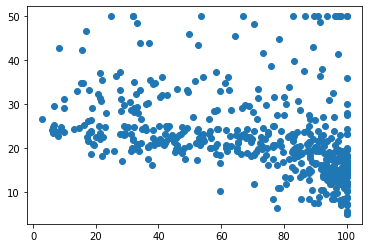

In [89]:
#2-2-d
_ = plt.scatter(dfBoston.age, dfBoston.medv)

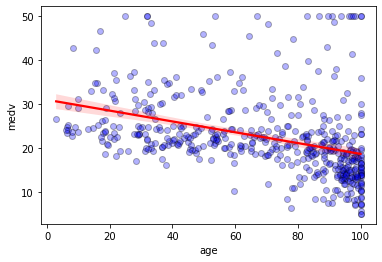

In [90]:
#2-2-e
import seaborn as sns
_ = sns.regplot(x = "age", y = "medv",
scatter_kws = {"color":"blue", "alpha":0.3,
"edgecolor":"black"},
line_kws={"color":"red"},
data=dfBoston)
_ = plt.show()

In [91]:
#2-2-f

The regression line is downward sloping. The dots are not well aligned along the regression line compared to the relationship between medv and rm. Many outliers exist in their relationship because they do not centralize along the regression line.

## 3. Multiple regression

1. Now use multiple regression to estimate the relationship between median house price and the neighborhood characteristics. Include all variables (except medv) as the explanatory variables. Print the output.
2. Interpret the results for rm and age, the same two variables your used above.
3. Why are these numbers different than when doing simple regression?

In [92]:
#3-1
m = smf.ols("medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat", 
            data=dfBoston).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        08:43:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
#3-2-rm

The neighborhood's houses with one room larger have \\$3809.9 larger the mediean value of houses. It is still statistically significant because P is smaller 5%.

In [94]:
#3-2-age

The houses with one pct pt older and built prior to 1940 are \$0.7 more expensive. However, it is no longer statistically significant because P is greater 5%.

In [95]:
#3-3

When it comes to multiple regression, some other variables may be correlated with age, which may lead to statistically insignificant p-values.